In [18]:
# import Matplot lib
%matplotlib inline

import matplotlib.pyplot as plt

In [19]:
#Import sklearn metrics being used
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

# linear regression, regression models, preprocessing features used
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import Normalizer, PolynomialFeatures, scale
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR


import pandas as pd

In [20]:
# Importing the dataset
dataset = pd.read_csv('data/testData5.csv', sep=";")
# print(dataset.describe())

In [21]:
# Do correlation in features:
corrMatrix=dataset.corr()
print corrMatrix

          a         b         c         d         e         t
a  1.000000  0.005130  0.016640 -0.002705  0.871609  0.516491
b  0.005130  1.000000 -0.006017  0.002834  0.008518 -0.000802
c  0.016640 -0.006017  1.000000 -0.011405  0.020131 -0.000158
d -0.002705  0.002834 -0.011405  1.000000 -0.000836  0.013338
e  0.871609  0.008518  0.020131 -0.000836  1.000000  0.555834
t  0.516491 -0.000802 -0.000158  0.013338  0.555834  1.000000


In [55]:
# we remove 'a' as a is highly correlated with e
chosen_fields = ['b', 'c', 'e']
X = dataset[chosen_fields]
y = dataset[['t']]

# to check p-value and t-values for features to check if they're important
print f_regression(X,y)

# Normalize the input features values
X[chosen_fields] = scale(X)

# Manually Normalize the features; so we can rescale it later

(array([  6.42483487e-03,   2.50167567e-04,   4.46986356e+03]), array([ 0.93611553,  0.98738095,  0.        ]))


/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [56]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [57]:
# try out different algorithms
# cv = StratifiedKFold(n_folds=5, random_state=0)

regressor_lo = Lasso(alpha=1)

regressor = GradientBoostingRegressor(loss='ls', alpha=0.6,
                                n_estimators=200, max_depth=3,
                                learning_rate=0.5, min_samples_leaf=9,
                                min_samples_split=5)
# Mean squared error: 280752.93
# Variance score: 0.48

regressor_li = LinearRegression()

regressor_ri = Ridge(alpha=1e-2, normalize=True, solver='cholesky')
regressor_svr = SVR(C=1e1, gamma=1e-3, kernel='linear')

In [58]:
regressor.fit(X_train, y_train,)

# Predicting the Test set result
y_pred = regressor.predict(X_test)


# print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Check how well your model fits around mean of 
y_pred_train = regressor.predict(X_train)
print r2_score(y_train, y_pred_train)

/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.06
0.989010874902


In [59]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Regressor variables
# print ( "Coefficients :" , regressor.coef_)
# print ("Intercept :" , regressor.intercept_)

Variance score: 0.98


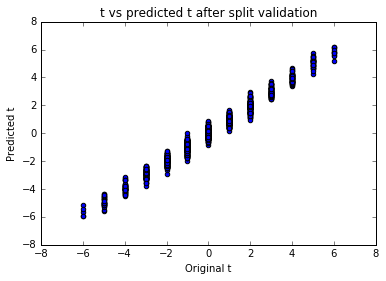

In [60]:
#see the model fit
plt.scatter(y_test, y_pred)
plt.title("t vs predicted t after split validation")
plt.xlabel("Original t")
plt.ylabel("Predicted t")

In [61]:
predicted_df = X_test

predicted_df['t'] = y_test
predicted_df['t_pred'] = y_pred


print predicted_df

             b         c         e  t    t_pred
9953  1.417922 -1.459027  1.478274 -1 -1.721234
3850  0.618196 -0.270512 -0.243513  0 -0.006305
4962  1.515103  0.975280  1.421330  3  3.549092
3886 -0.154106 -0.442878  1.474133  0 -0.015287
5437  1.079987 -0.303509  0.747317  0 -0.085840
8517  1.245789  0.709059 -1.395168 -3 -2.318967
2041 -0.553215 -0.068900  1.520034  1  0.876613
1989 -0.572071  1.043186  0.121620  0 -0.023230
1933  1.642038  1.073123  0.934198  2  2.256925
9984 -0.631740  0.008546  0.077618  0 -0.064672
8418  0.265058 -0.916388 -1.404831  0 -0.033130
2418  1.250645 -1.142701  1.423919 -1 -0.777318
6811 -0.724795  0.200433 -0.419695  0 -0.017089
1217  1.713935 -0.420822  0.921083  0  0.081431
6978 -1.168957  0.745190 -1.505951 -3 -3.268690
6111 -0.983268  1.596504  0.852750  3  2.891585
7865 -1.672322  0.240098 -0.403820  0 -0.117172
7781  1.071309 -0.972845  1.310548  0  0.042717
7775  0.370797  0.388839 -0.632115 -1 -0.522932
7039  1.248316  1.120975  1.534701  4  4

/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [62]:
# Save the model to disk - Please see the read.md file to see how to use these models
import pickle
filename = 'models/testData5.model'
pickle.dump(regressor, open(filename, 'wb'))

In [57]:
# To predict a new file use this - regressor.predict(data)